# **Import & Load Dataset**

In [1]:
#import libarires required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading our excel file
df=pd.read_excel("Apples_stock price dataset.xlsx" , sheet_name="Sheet1")

In [3]:
df

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [4]:
# Cleaning the column names
df.columns = [c.strip().lower() for c in df.columns]

In [5]:
# checking the basic info
print("Shape:",df.shape)

Shape: (100000, 8)


In [6]:
print("Columns:", df.columns.tolist())

Columns: ['timestamp', 'stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   timestamp          100000 non-null  datetime64[ns]
 1   stock_price        99969 non-null   float64       
 2   nasdaq_index       99993 non-null   float64       
 3   sp500_index        99996 non-null   float64       
 4   inflation_rate     99992 non-null   float64       
 5   unemployment_rate  99996 non-null   float64       
 6   interest_rate      99998 non-null   float64       
 7   market_sentiment   99996 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.1 MB


In [8]:
df.describe()

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,100000,99969.000000,99993.000000,99996.000000,99992.000000,99996.000000,99998.000000,99996.000000
mean,2015-09-15 07:30:00,299.991904,259114.622519,101463.085069,3.004255,4.996003,2.001474,0.003208
min,2010-01-01 00:00:00,9.537676,7984.160950,2981.778422,1.000002,3.000021,0.500135,-0.999990
25%,2012-11-07 15:45:00,248.619582,134716.834762,51573.589744,2.005934,3.999036,1.254851,-0.498332
50%,2015-09-15 07:30:00,300.071948,257861.008478,100923.141212,3.005833,4.990133,2.000173,0.004348
75%,2018-07-22 23:15:00,351.442877,385205.578140,151634.820165,4.001412,5.994514,2.750588,0.504524
max,2021-05-29 15:00:00,601.664858,507957.788157,200815.813093,4.999993,6.999958,3.499985,0.999986
std,NaN,91.443363,144514.371806,57294.513880,1.152769,1.154703,0.864929,0.578063


The column counts are not consistent up to 100,000, with several columns having fewer entries. This indicates the presence of missing values in the dataset.

# **Parse DateTime & Set Index**

In [9]:
#converting the timestamp column into a actual datatime objects which might be in string/ text format
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce')

In [10]:
#droping rows with invalid timestamps
df.dropna(subset=['timestamp']).sort_values('timestamp')

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [11]:
#makes the timestamp column to index of dataset
df.set_index('timestamp', inplace=True)

In [12]:
df.head()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


# **Keep only 4:00 AM to 8:00 PM ET (and exclude weekends)**

In [13]:
# Keeping only time between 04:00 and 20:00
df = df.between_time('04:00', '20:00')

In [14]:
# Removing Saturdays and Sundays
df = df[df.index.dayofweek < 5]  #making mon=0 , tue=1, wed=2, thur=3, fri=4 , sat=5, sun=6

In [15]:
df.head(48)

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609
2010-01-01 09:00:00,103.059812,8040.445418,3023.941939,4.509695,4.716829,1.884053,-0.452717
2010-01-01 10:00:00,98.068478,8056.045268,3028.223289,4.708331,4.913421,1.715299,0.774117
2010-01-01 11:00:00,98.095471,8048.212134,3036.325757,4.074317,5.831791,2.032927,-0.368769
2010-01-01 12:00:00,101.672484,8029.145300,3032.338086,4.535430,6.591331,1.048660,0.412976


In [16]:
#after filtering required columns which are only from 4am to 8pm everyday in dataset excling the saturday and sunday
df.shape

(50592, 7)

In [17]:
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50574.000000,50588.000000,50589.000000,50588.000000,50588.000000,50592.000000,50592.000000
mean,300.052183,259173.150757,101487.400021,3.008912,4.997872,2.000613,0.001613
std,91.446437,144504.272713,57290.335208,1.151914,1.154320,0.867870,0.577064
min,21.246547,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.692352,134778.076396,51584.559264,2.008276,3.998066,1.252027,-0.501901
50%,300.080789,257970.004799,100986.704609,3.008890,4.995886,1.997309,0.003999
75%,351.492456,385291.863441,151664.237223,4.007123,5.995707,2.756850,0.501860
max,589.000000,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


After filtering the dataset to include only the records between **4:00 AM and 8:00 PM** each day, and excluding Saturdays and Sundays to match actual U.S. stock market trading hours, the dataset was reduced from **100,000 rows to 50,592 rows.**

# **Handle Missing Values (Blanks)**

In [18]:
#counting missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
stock_price          18
nasdaq_index          4
sp500_index           3
inflation_rate        4
unemployment_rate     4
interest_rate         0
market_sentiment      0
dtype: int64


Filling numeric columns logically for
stock_price ,
nasdaq_index ,
sp500_index .

Economic indicators change slowly use forward fill for inflation_rate , unemployement_rate , interest rate .

Market sentiment column can fluctuate  use mean imputation

In [19]:
#checking exactly which row has missing values
df[df.isna().any(axis=1)]


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,NaN,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,NaN,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913
2010-01-12 05:00:00,110.776492,9372.875148,NaN,1.250073,6.298113,2.781349,0.306551
2010-01-15 10:00:00,105.573221,NaN,3608.402892,1.190810,4.267040,2.726655,0.313841
2010-01-22 04:00:00,NaN,10763.760787,3896.357941,1.719737,4.331568,1.527258,-0.424500
2010-02-04 17:00:00,121.424695,12371.442475,4557.917556,1.546872,NaN,1.542167,0.903861
2010-02-18 07:00:00,NaN,13925.332671,5263.969329,2.955403,5.233097,2.337254,0.335696
2010-02-24 13:00:00,NaN,14919.644033,5517.314104,3.632481,6.297237,1.664928,-0.783345
2010-03-16 11:00:00,115.556495,17332.014188,6363.568058,NaN,5.464320,1.135598,-0.501624


### 1. Filling missing values Time-based interpolation for stock and market
for columns stock_price , nasdaq_index , sp500_index.
Fills missing values by estimating what the value should have been at that timestamp, based on nearby known values.

In [20]:
# Filling stock_price columns logically
df['stock_price'] = df['stock_price'].interpolate(method='time')

In [21]:
#checking the stock_price column is filled or not
df.loc[['2010-01-07 10:00:00','2010-01-11 10:00:00']]

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,104.685611,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,112.746225,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913


Here the stock_price are successfully filled by interpolation

In [22]:
#similarly for nasdaq_index and sp500_index
df['nasdaq_index'] = df['nasdaq_index'].interpolate(method='time')
df['sp500_index'] = df['sp500_index'].interpolate(method='time')

### 2. Forward fill for slow-moving economic indicators
for columns inflation_rate , unemployement_rate , interest_rate.
Forward fill (ffill) replaces missing values with the last known valid value.

In [23]:
df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\3965981533.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\3965981533.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\3965981533.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


### 3. Mean imputation for market sentiment

for market_sentiment column
Replaces missing sentiment values with the average sentiment score across the dataset.

In [24]:
df['market_sentiment'] = df['market_sentiment'].fillna(df['market_sentiment'].mean())


In [25]:
#recheck wheather the all columns missing values are filled or not
df.isnull().sum()

stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64

Successfully all the columns blanks has been filled ...

In [26]:
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000
mean,300.037121,259167.392017,101484.742390,3.008883,4.997900,2.000613,0.001613
std,91.456147,144506.514286,57292.195056,1.151901,1.154327,0.867870,0.577064
min,21.246547,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.689991,134765.410872,51579.870199,2.008276,3.998066,1.252027,-0.501901
50%,300.078618,257959.907708,100977.245155,3.008848,4.995886,1.997309,0.003999
75%,351.486776,385291.863441,151668.903450,4.007123,5.995972,2.756850,0.501860
max,589.000000,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


# **Handle Outliers (Don’t Drop)**

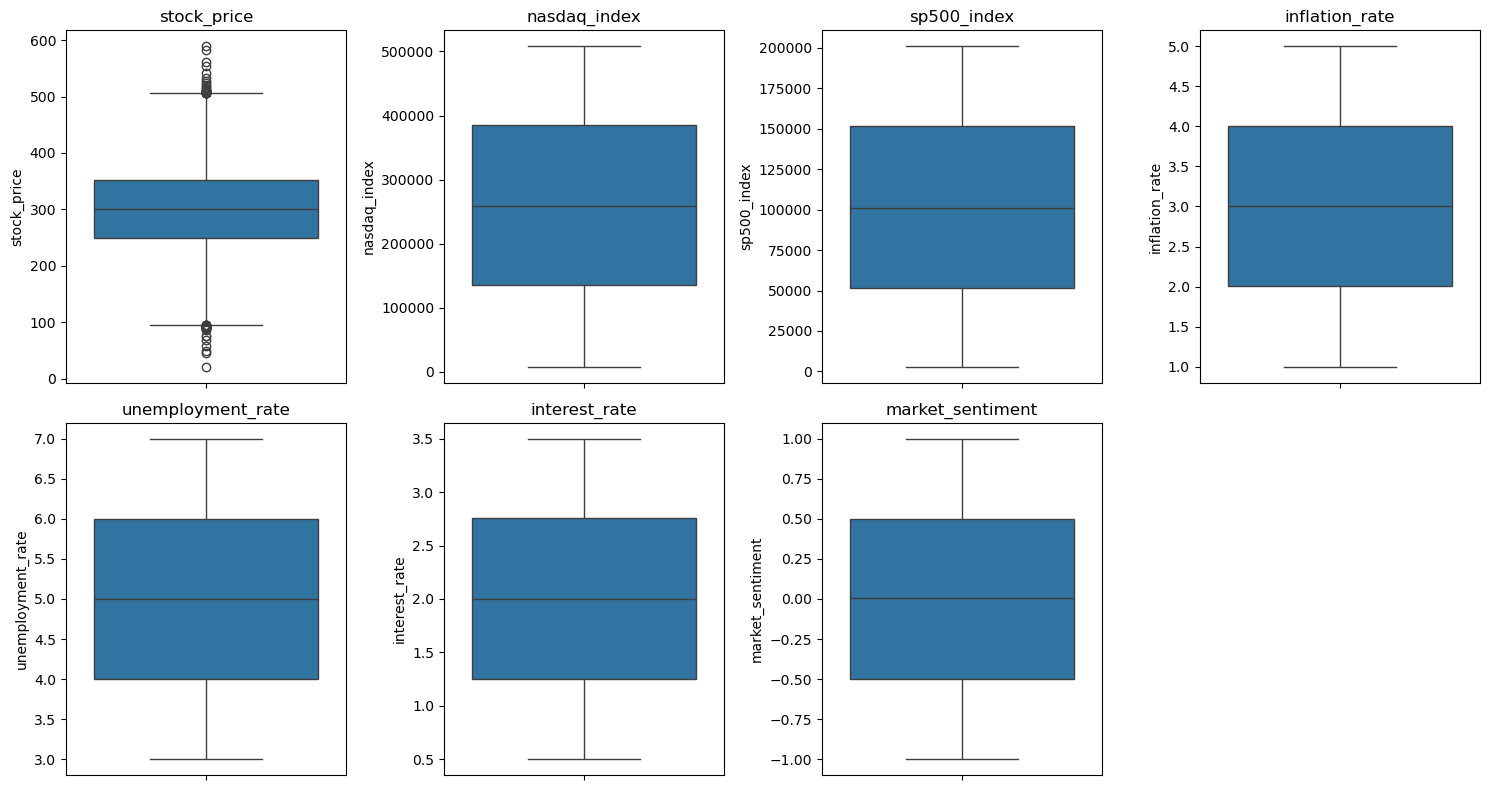

In [27]:
#generating boxplots for all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                'inflation_rate', 'unemployment_rate',
                'interest_rate', 'market_sentiment']

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


From the boxplots, it is evident that outliers are present only in the stock_price column. Therefore, we will use the IQR method to handle and cap these outliers appropriately.

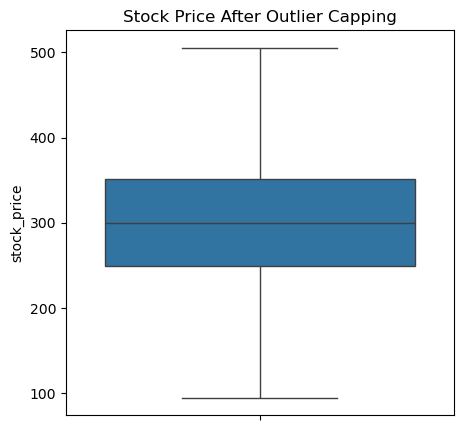

In [28]:
# Calculate Q1, Q3, and IQR for 'stock_price'
Q1 = df['stock_price'].quantile(0.25)
Q3 = df['stock_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['stock_price'] = df['stock_price'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['stock_price'])
plt.title('Stock Price After Outlier Capping')
plt.show()

In [29]:
#statistical anlaysis
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000
mean,300.034889,259167.392017,101484.742390,3.008883,4.997900,2.000613,0.001613
std,91.416973,144506.514286,57292.195056,1.151901,1.154327,0.867870,0.577064
min,94.494813,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.689991,134765.410872,51579.870199,2.008276,3.998066,1.252027,-0.501901
50%,300.078618,257959.907708,100977.245155,3.008848,4.995886,1.997309,0.003999
75%,351.486776,385291.863441,151668.903450,4.007123,5.995972,2.756850,0.501860
max,505.681953,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


# **Exploratory Data Anlaysis**

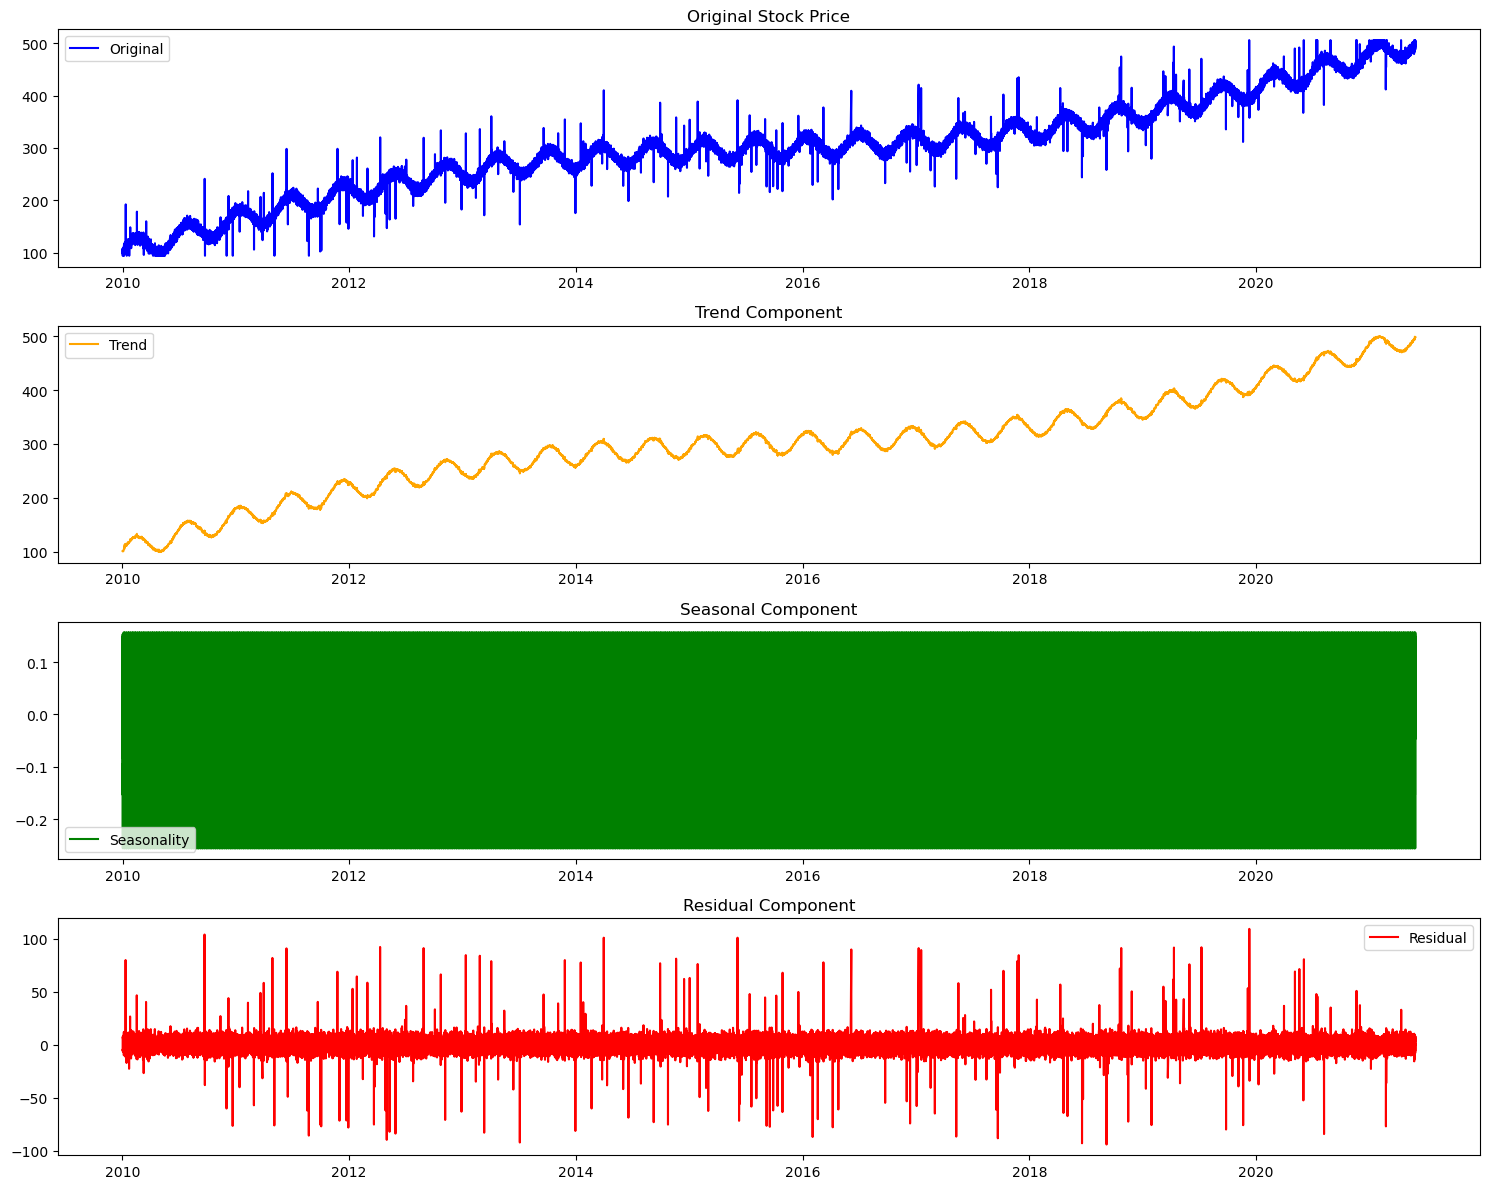

In [30]:
#trend, sesaonality , residual for stock_price column
#Assuming hourly data, we can try period = 24 (daily seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['stock_price'], model='additive', period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(15,12))

plt.subplot(4,1,1)
plt.plot(df['stock_price'], label='Original', color='blue')
plt.title('Original Stock Price')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

Period is set to 24 for hourly data with daily seasonality.

If you want weekly seasonality, set period=24*5 (5 trading days).

For monthly trends, use period=24* 5 *4 (approx 4 weeks).

here the dataset follows the Upward Linear Trend and non-seasonal

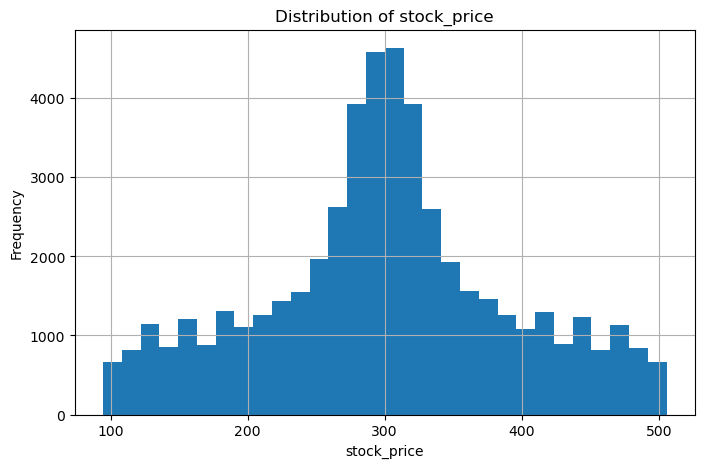

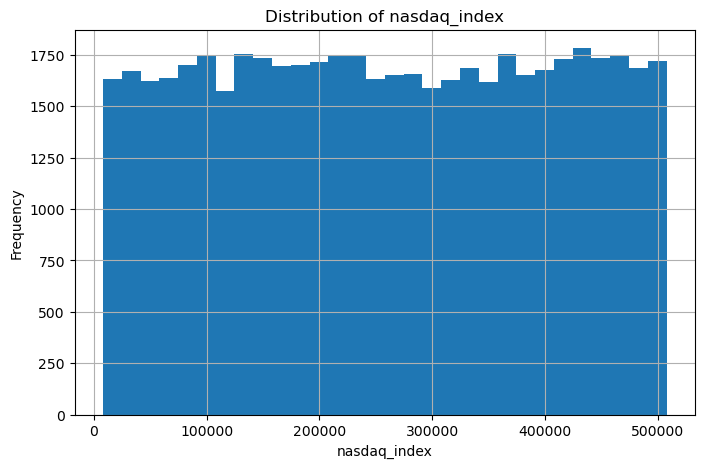

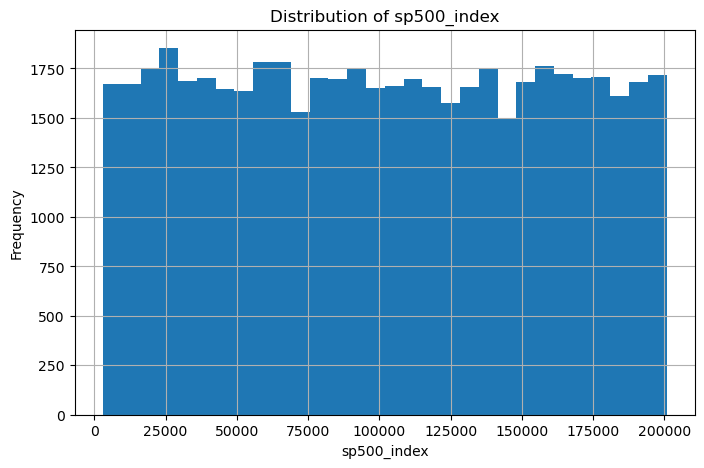

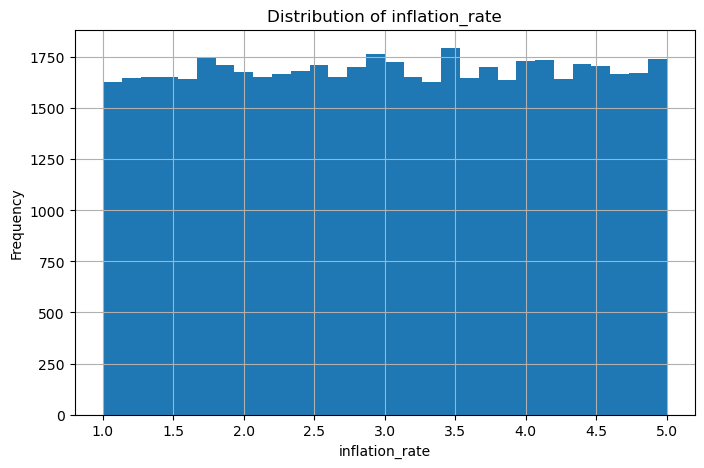

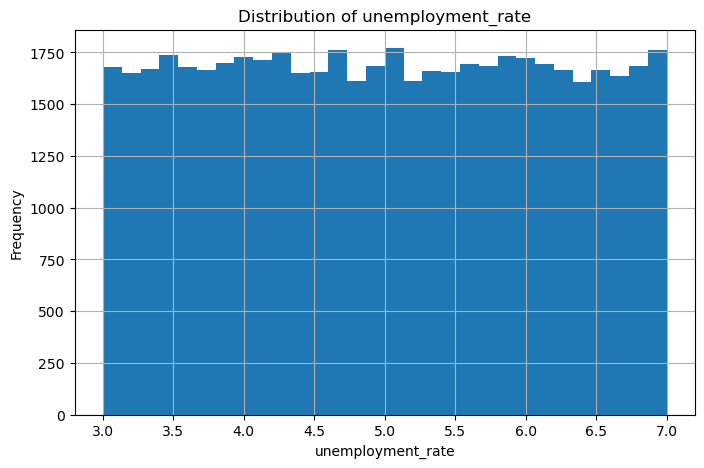

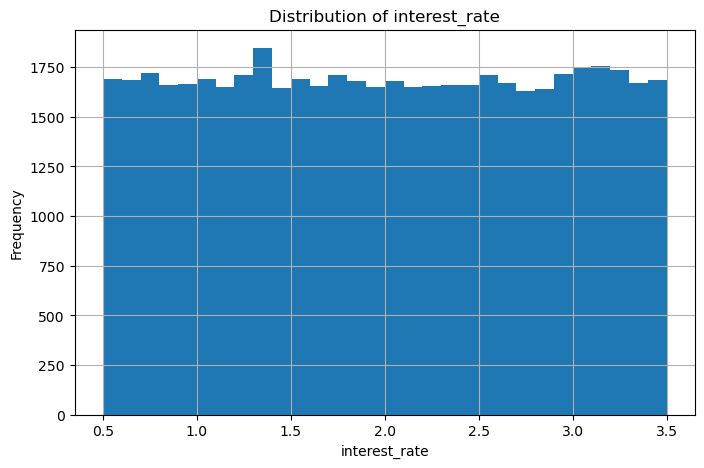

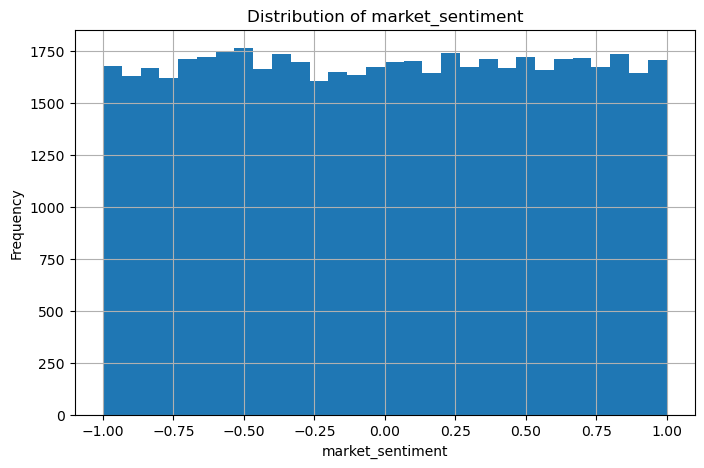

In [31]:
#Distribution plots (Histogram)
numeric_cols = ['stock_price','nasdaq_index','sp500_index','inflation_rate','unemployment_rate','interest_rate','market_sentiment']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

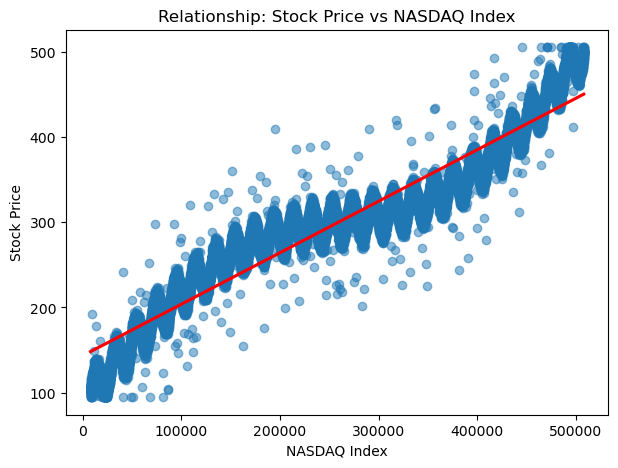

In [32]:
# Scatter Plot: Stock Price vs NASDAQ
plt.figure(figsize=(7,5))
sns.regplot(x='nasdaq_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship: Stock Price vs NASDAQ Index')
plt.xlabel('NASDAQ Index')
plt.ylabel('Stock Price')
plt.show()

The Stock Price shows a strong positive relationship with the NASDAQ Index, meaning that as the NASDAQ Index increases, the Stock Price also tends to rise.

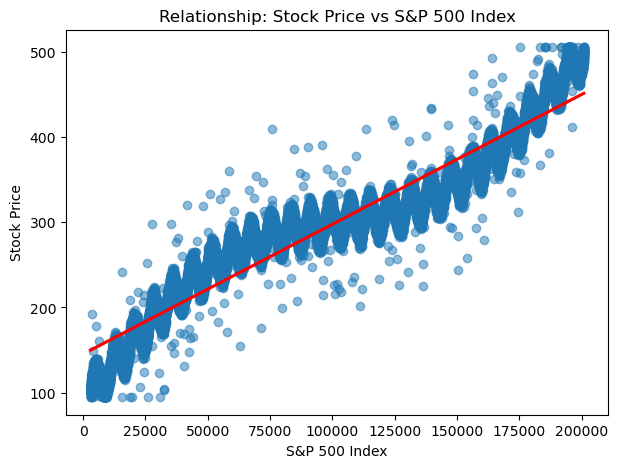

In [33]:
#Scatter Plot: Stock Price vs S&P 500
plt.figure(figsize=(7,5))
sns.regplot(x='sp500_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship: Stock Price vs S&P 500 Index')
plt.xlabel('S&P 500 Index')
plt.ylabel('Stock Price')
plt.show()

The Stock Price rises with respect to the S&P 500 Index, indicating a strong positive correlation between them. As the S&P 500 increases, the Stock Price also tends to move upward.

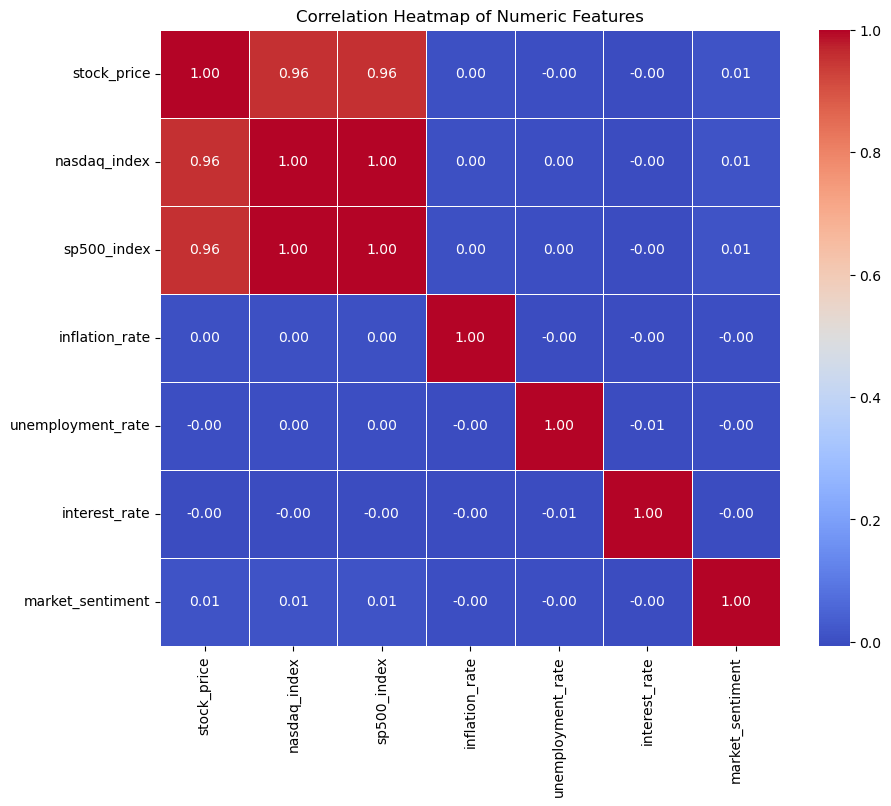

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

by above correlation mapping we can understand that the nasadq_index and sp500_index having a very strong positive relationships.

nasdaq_index has 0.96
Strong positive relation

sp500_index has 0.96
Strong positive relation

Our stock price is highly market-driven, tightly coupled with major indices like NASDAQ and S&P 500.

This means when the NASDAQ or S&P 500 rises, your stock price also increases, and vice versa.

nasdaq_index and sp500_index are sufficient and optimal starting predictors for model fitting and forecasting stock_price.

### LSTM (Long Short - Term Memory)

It is a type of Recurrent Neural Network (RNN) used in Deep Learning to progress sequential data, such as text or time-series.

In [35]:
!pip install tensorflow

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 376s 161ms/step - loss: 7.5765e-04 - val_loss: 3.3003e-04
Epoch 2/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 394s 173ms/step - loss: 4.7550e-04 - val_loss: 3.6709e-04
Epoch 3/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 389s 171ms/step - loss: 4.8147e-04 - val_loss: 4.4488e-04
Epoch 4/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 404s 178ms/step - loss: 4.7451e-04 - val_loss: 3.5395e-04
Epoch 5/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 406s 179ms/step - loss: 4.6973e-04 - val_loss: 3.2787e-04
Epoch 6/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 402s 177ms/step - loss: 4.6458e-04 - val_loss: 4.4730e-04
Epoch 7/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 410s 181ms/step - loss: 4.5915e-04 - val_loss: 3.3421e-04
Epoch 8/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 408s 179ms/step - loss: 4.4620e-04 - val_loss: 4.6739e-04
Epoch 9/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 394s 173ms/step - loss: 4.4376e-04 - val_loss: 3.2786e-04
Epoch 10/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 391s 172ms/step - loss: 4.4026e-04 - val_loss: 5.8043e-04

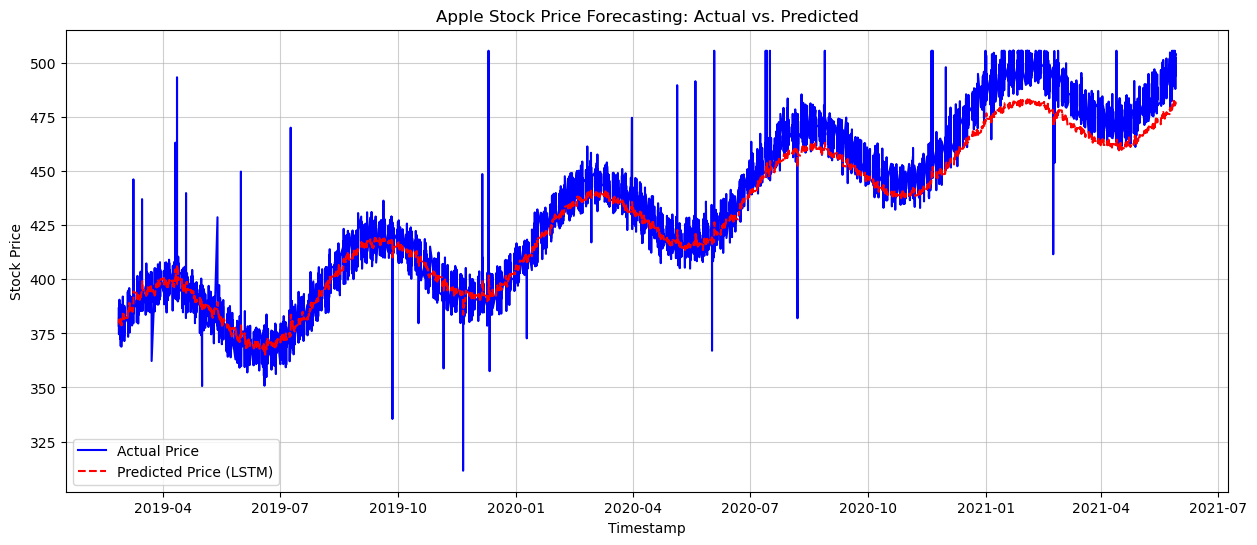

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Use stock price only (can expand to multivariate later)
data = df[['stock_price']].values

# Train-test split
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale between 0 and 1 (fit only on train)
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Function to create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 90  # can experiment with 60, 90, 120
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='nadam', loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.1, callbacks=[early_stop])

# Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Metrics
mae = mean_absolute_error(y_test_actual, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_stock_price))

print("MAE:", mae)
print("RMSE:", rmse)

import matplotlib.pyplot as plt
import pandas as pd

# --- Assuming the LSTM script was successfully executed ---
# Variables: predicted_stock_price, y_test_actual, train_size, time_step, df (preprocessed DataFrame)

# 1. Get the timestamps for the test predictions (compensating for the time_step used for lookback)
# Note: You must ensure 'df' and 'train_size' are available from the preprocessing steps.
time_step = 90  # Must match the value used in the LSTM script
test_timestamps = df.index[train_size + time_step:]

# 2. Create a DataFrame for easy plotting
predictions_df = pd.DataFrame({
    # Assuming the variables have been successfully generated by the LSTM script
    'Actual Stock Price': y_test_actual.flatten(),
    'Predicted Stock Price': predicted_stock_price.flatten()
}, index=test_timestamps)

# 3. Plotting the Results
plt.figure(figsize=(15, 6))
plt.plot(predictions_df['Actual Stock Price'], label='Actual Price', color='blue')
plt.plot(predictions_df['Predicted Stock Price'], label='Predicted Price (LSTM)', color='red', linestyle='--')

plt.title('Apple Stock Price Forecasting: Actual vs. Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

In [37]:
mean = df['stock_price'].mean()

mape = (mae/mean)*100
rmspe = (rmse/mean)*100

print(f'Mean Absolute Percentage Error (MAPE): {mape: 2f}%')
print(f'Root Mean Squared Percentage Error (RMSPE): {rmspe: 2f}%')

Mean Absolute Percentage Error (MAPE):  2.419029%
Root Mean Squared Percentage Error (RMSPE):  3.229841%


#### Predecting the next 30-days of stock price

Generating 30-day forecast...


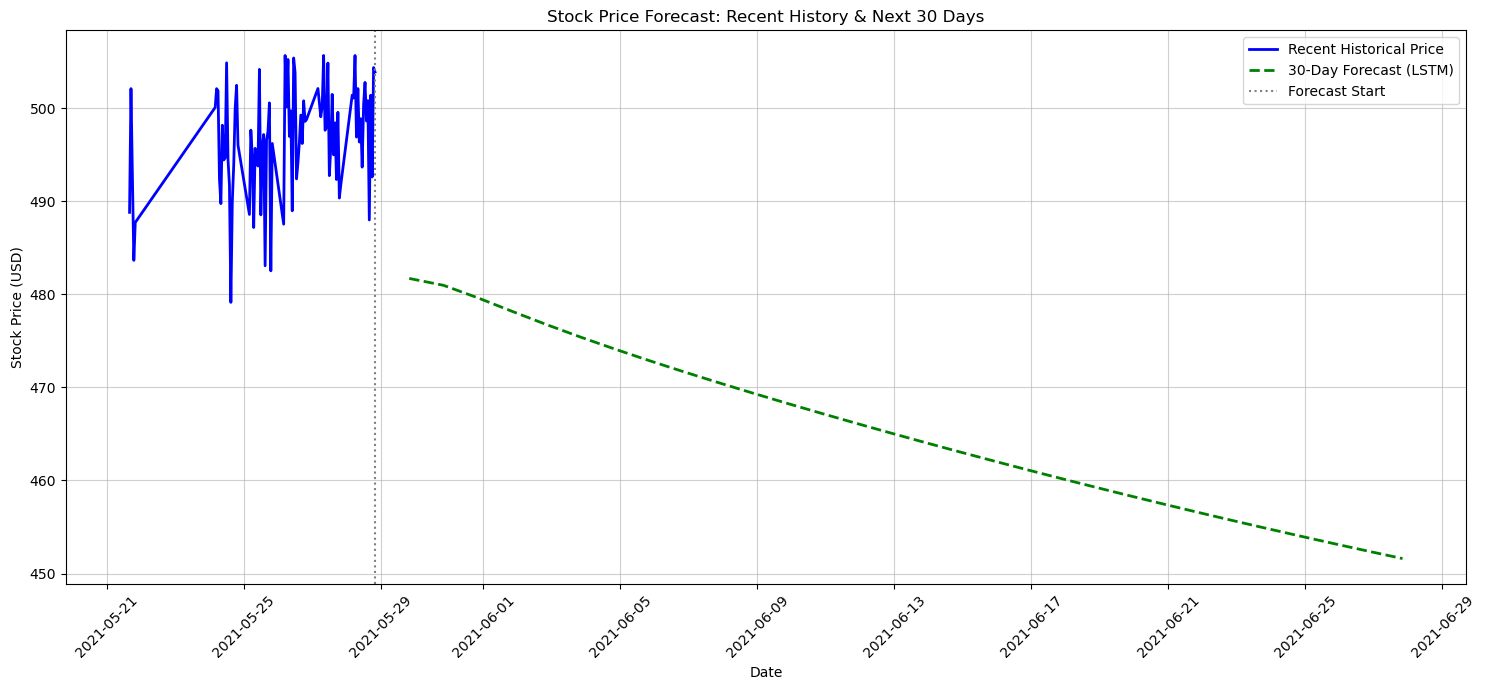

In [41]:
import numpy as np
import pandas as pd
# Assuming tensorflow, model, scaler, and df are defined in your environment

def predict_next_30_days(model, data, time_step, scaler):
    """
    Predicts the next 30 days of stock prices using a trained LSTM model
    with rolling forecasting, handling the dimension errors.

    Args:
        model (tf.keras.Model): The trained LSTM model.
        data (np.array): The full historical scaled data (train + test).
        time_step (int): The lookback window size used during training (e.g., 90).
        scaler (sklearn.MinMaxScaler): The fitted scaler for inverse transformation.

    Returns:
        pd.DataFrame: A DataFrame with future dates and predicted values.
    """

    # Ensure data is a NumPy array for consistent slicing
    if isinstance(data, pd.Series) or isinstance(data, pd.DataFrame):
        data = data.values

    # Get the last 'time_step' number of scaled prices
    last_sequence = data[-time_step:].reshape(-1, 1)

    # Reshape for LSTM: (1, time_step, features)
    input_seq = last_sequence.reshape(1, time_step, 1)
    predictions = []

    for _ in range(30):
        # 1. Predict the next value
        # verbose=0 suppresses the prediction output logs
        next_pred = model.predict(input_seq, verbose=0)
        predictions.append(next_pred[0])

        # 2. Reshape the prediction to match the required 3D structure for appending: (1, 1, 1)
        new_timestep = next_pred.reshape(1, 1, 1)

        # 3. Update the input sequence:
        #    - Drop the oldest value (input_seq[:, 1:, :]) -> Shape (1, time_step - 1, 1)
        #    - Append the new prediction (new_timestep) -> Shape (1, 1, 1)
        #    - Resulting Shape: (1, time_step, 1)
        # This is the line that fixes the ValueError:
        input_seq = np.append(input_seq[:, 1:, :], new_timestep, axis=1)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions) # Inverse transform

    # Generate future dates (Requires 'df' to be defined globally)
    try:
        last_date = pd.to_datetime(df.index[-1])
    except NameError:
        print("Warning: 'df' not defined. Using today's date as a placeholder.")
        last_date = pd.Timestamp('today').normalize()

    future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]

    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Value': predictions.flatten()
    })
    forecast_df.set_index('Date', inplace=True)

    return forecast_df

# --- EXECUTION AND PLOTTING (Assuming model, scaler, time_step, df, train_scaled, test_scaled are defined) ---

# Define the combined_scaled_data used for the input to the forecast function
# This is required to get the latest sequence for the forecast
combined_scaled_data = np.concatenate((train_scaled, test_scaled), axis=0)

# 1. Call the function to define 'forecast_df'
print("Generating 30-day forecast...")
forecast_df = predict_next_30_days(model, combined_scaled_data, time_step=time_step, scaler=scaler)

# 2. PLOTTING THE 30-Day FORECAST (with Recent History)
history_days = 90
history_data = df['stock_price'][-history_days:]

plt.figure(figsize=(15, 7))

# Plot the recent actual historical data
plt.plot(history_data.index, history_data.values, label='Recent Historical Price', color='blue', linewidth=2)

# Plot the 30-day forecast
plt.plot(forecast_df.index, forecast_df['Predicted_Value'], label='30-Day Forecast (LSTM)', color='green', linestyle='--', linewidth=2)

# Mark the start of the forecast
last_history_date = history_data.index[-1]
plt.axvline(x=last_history_date, color='grey', linestyle=':', linewidth=1.5, label='Forecast Start')

plt.title('Stock Price Forecast: Recent History & Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True, alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
display(forecast_df)

,Predicted_Value
Date,
2021-05-29 20:00:00,481.718445
2021-05-30 20:00:00,480.977936
2021-05-31 20:00:00,479.636902
2021-06-01 20:00:00,478.184967
2021-06-02 20:00:00,476.767548
2021-06-03 20:00:00,475.415833
2021-06-04 20:00:00,474.127838
2021-06-05 20:00:00,472.893585
2021-06-06 20:00:00,471.703644


#### The forecast extends for 30 days, from approximately May 29th to June 28th, 2021.

* Behavior: The LSTM model predicts a sharp and steady downtrend for the stock price over the next 30 days.

* The prediction starts around $482 (a significant drop from the last historical high).

* It steadily declines, ending near $450 by the end of June.

* Interpretation: The model, trained on the preceding 90 days of data (as implied by the code), seems to have captured underlying bearish momentum or is responding to the recent volatility by reverting to a lower mean, resulting in a continuous downward prediction.

#### Conclusion on Model Performance
The graph visually demonstrates the output of the rolling window forecasting approach:

* Prediction Gap: There's a clear discontinuity between the last historical price (which was highly volatile and reached over $500) and the predicted starting price (around $482). This suggests the model did not immediately follow the last historical peak but rather began its forecast from a point closer to the lower boundary of the recent historical data.

* Lack of Volatility: Unlike the historical data, the forecasted line is smooth. This is typical of a standard LSTM model making autoregressive predictions; it rarely predicts the kind of sharp, day-to-day volatility seen in real stock data, instead favoring a smooth trend based on the sequence average.